In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp
from scipy.spatial import distance

In [2]:
class Filters():
  def __init__(self):
    pass

  def GLP(self,D0,img_shape):
      H = np.zeros(img_shape)
      rows, cols = img_shape
      center = (rows/2,cols/2)
      for u in range(rows):
          for v in range(cols):
              H[u,v] = exp(((-distance.euclidean((u,v),center)**2)/(2*(D0**2))))
      return H

  def GHP(self, D0,img_shape):
      H = np.zeros(img_shape)
      rows, cols = img_shape
      center = (rows/2,cols/2)
      for u in range(rows):
          for v in range(cols):
              H[u,v] = 1 - exp(((-distance.euclidean((u,v),center)**2)/(2*(D0**2))))
      return H

  def Laplacian(self,img_shape):
      H = np.zeros(img_shape)
      rows, cols = img_shape
      center = (rows/2,cols/2)
      for u in range(rows):
          for v in range(cols):
              H[u,v] = -((u - (rows / 2)) **2 + (v - (cols / 2)) ** 2) / (5*rows)
      return H


class Helpers():
  def __init__(self):
    pass

  def get_image_frequency_domain(self, img_path, width, height):
    img = cv2.imread(img_path, 0)
    img = cv2.resize(img, (width,height), interpolation = cv2.INTER_AREA)
    img_FD = np.fft.fft2(img)
    img_FD = np.fft.fftshift(img_FD)
    return img, img_FD

  def get_image_time_domain(self, img_FD):
    img_TD_Center = np.fft.ifftshift(img_FD)
    img_TD = np.fft.ifft2(img_TD_Center)
    return img_TD


helper = Helpers()
filter = Filters()

## **Hybrid Images is Generated using Gaussian Low-pass and High-Pass Filtering**

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4555859a90>,
 Text(0.5, 1.0, 'High Frequecy Content  Using Gaussing (D0=10)'))

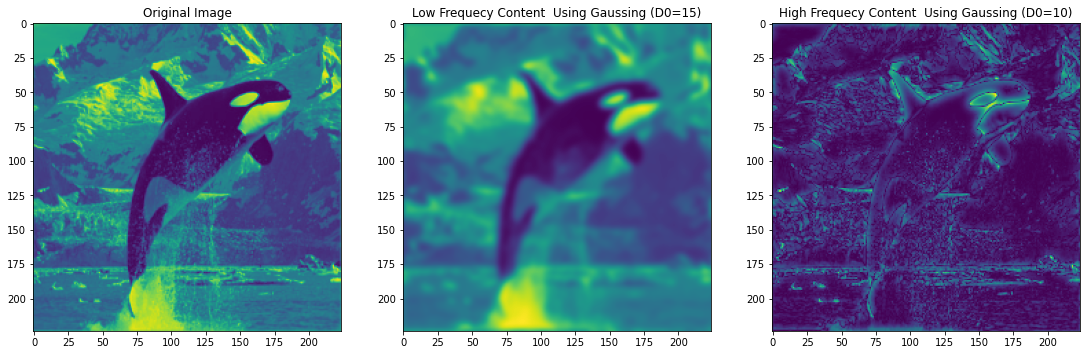

In [168]:
img_11, img_11_FD = helper.get_image_frequency_domain("img_11.jpg",224,224)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151), plt.imshow(img_11), plt.title("Original Image")

low_pass_image_11 = img_11_FD * filter.GLP(15,img_11.shape)
low_pass_image_TD_11 = helper.get_image_time_domain(low_pass_image_11)
low_pass_image_TD_11 = np.abs(low_pass_image_TD_11)
plt.subplot(152), plt.imshow(low_pass_image_TD_11), plt.title("Low Frequecy Content  Using Gaussing (D0=15)")

high_pass_image_11 = img_11_FD * filter.GHP(10,img_11.shape)
high_pass_image_TD_11 = helper.get_image_time_domain(high_pass_image_11)
high_pass_image_TD_11 = np.abs(high_pass_image_TD_11)
plt.subplot(153), plt.imshow(high_pass_image_TD_11), plt.title("High Frequecy Content  Using Gaussing (D0=10)")

(<matplotlib.axes._subplots.AxesSubplot at 0x7f455571c0f0>,
 Text(0.5, 1.0, 'High Frequecy Content  Using Gaussing (D0=10)'))

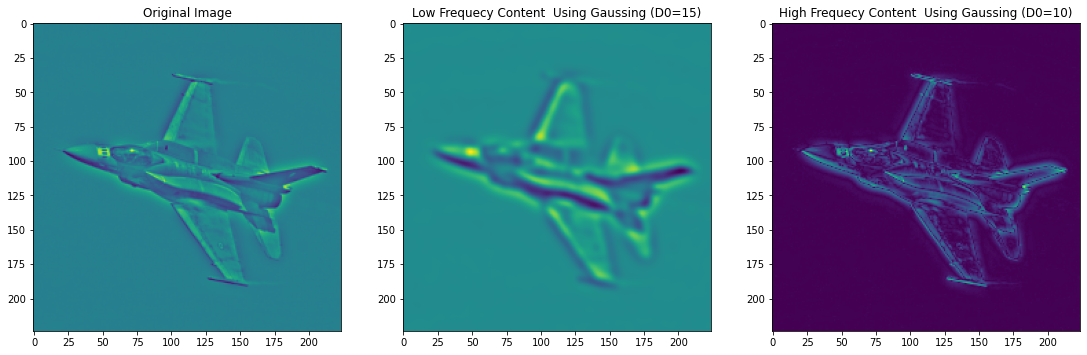

In [169]:
img_12, img_12_FD = helper.get_image_frequency_domain("img_12.jpg",224,224)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151), plt.imshow(img_12), plt.title("Original Image")

low_pass_image_12 = img_12_FD * filter.GLP(15,img_12.shape)
low_pass_image_TD_12 = helper.get_image_time_domain(low_pass_image_12)
low_pass_image_TD_12 = np.abs(low_pass_image_TD_12)
plt.subplot(152), plt.imshow(low_pass_image_TD_12), plt.title("Low Frequecy Content  Using Gaussing (D0=15)")

high_pass_image_12 = img_12_FD * filter.GHP(10,img_12.shape)
high_pass_image_TD_12 = helper.get_image_time_domain(high_pass_image_12)
high_pass_image_TD_12 = np.abs(high_pass_image_TD_12)

plt.subplot(153), plt.imshow(high_pass_image_TD_12), plt.title("High Frequecy Content  Using Gaussing (D0=10)")

(<matplotlib.image.AxesImage at 0x7f45555b5278>,
 Text(0.5, 1.0, 'Hybrid Image, Experiment 1, Both Filters are Gaussian'))

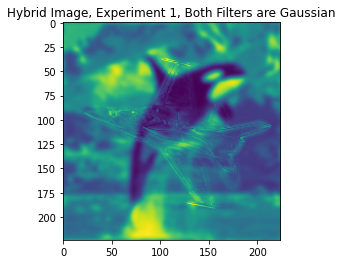

In [170]:
hybrid_img_1 = low_pass_image_TD_11 + high_pass_image_TD_12
plt.imshow(np.abs(hybrid_img_1),), plt.title("Hybrid Image, Experiment 1, Both Filters are Gaussian")

(<matplotlib.axes._subplots.AxesSubplot at 0x7f45555afd68>,
 Text(0.5, 1.0, 'High Frequecy Content  Using Gaussing (D0=10)'))

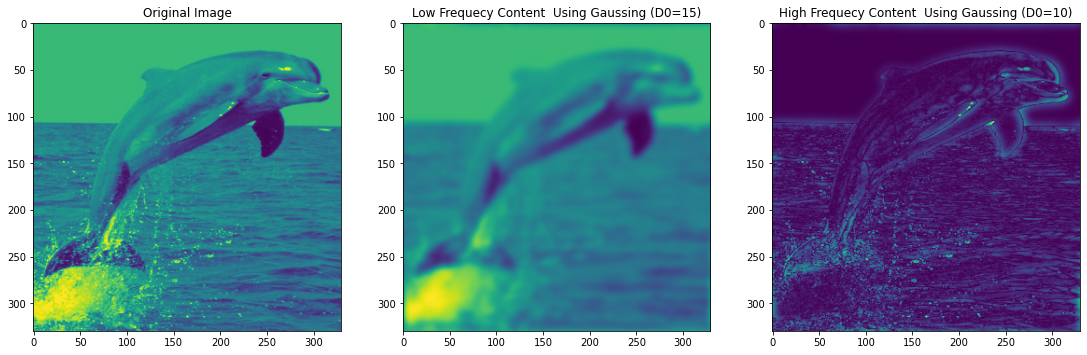

In [171]:
img_21, img_21_FD = helper.get_image_frequency_domain("img_21.jpg",330,330)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151), plt.imshow(img_21), plt.title("Original Image")

low_pass_image_21 = img_21_FD * filter.GLP(15,img_21.shape)
low_pass_image_TD_21 = helper.get_image_time_domain(low_pass_image_21)
low_pass_image_TD_21 = np.abs(low_pass_image_TD_21)
plt.subplot(152), plt.imshow(low_pass_image_TD_21), plt.title("Low Frequecy Content  Using Gaussing (D0=15)")

high_pass_image_21 = img_21_FD * filter.GHP(10,img_21.shape)
high_pass_image_TD_21 = helper.get_image_time_domain(high_pass_image_21)
high_pass_image_TD_21 = np.abs(high_pass_image_TD_21)
plt.subplot(153), plt.imshow(high_pass_image_TD_21), plt.title("High Frequecy Content  Using Gaussing (D0=10)")

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4555452668>,
 Text(0.5, 1.0, 'High Frequecy Content  Using Gaussing (D0=10)'))

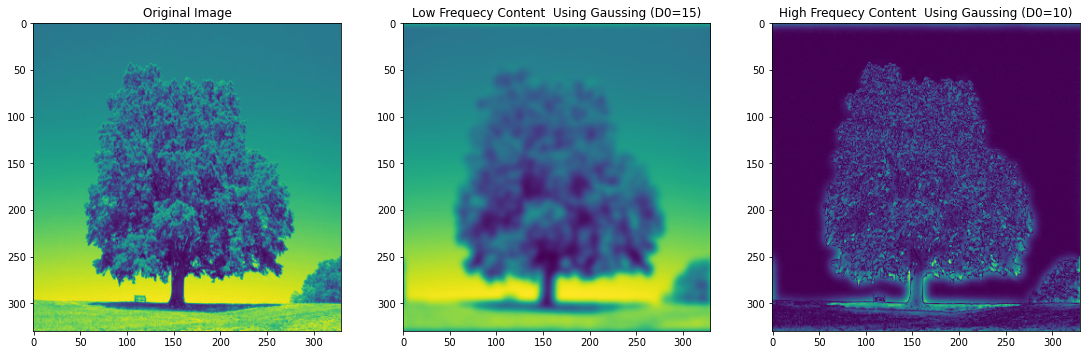

In [172]:
img_22, img_22_FD = helper.get_image_frequency_domain("img_22.jpg",330,330)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151), plt.imshow(img_22), plt.title("Original Image")

low_pass_image_22 = img_22_FD * filter.GLP(15,img_22.shape)
low_pass_image_TD_22 = helper.get_image_time_domain(low_pass_image_22)
low_pass_image_TD_22 = np.abs(low_pass_image_TD_22)
plt.subplot(152), plt.imshow(low_pass_image_TD_22), plt.title("Low Frequecy Content  Using Gaussing (D0=15)")

high_pass_image_22 = img_22_FD * filter.GHP(10,img_22.shape)
high_pass_image_TD_22 = helper.get_image_time_domain(high_pass_image_22)
high_pass_image_TD_22 = np.abs(high_pass_image_TD_22)
plt.subplot(153), plt.imshow(high_pass_image_TD_22), plt.title("High Frequecy Content  Using Gaussing (D0=10)")

(<matplotlib.image.AxesImage at 0x7f4555333550>,
 Text(0.5, 1.0, 'Hybrid Image, Experiment 2, Both Filters are Gaussian'))

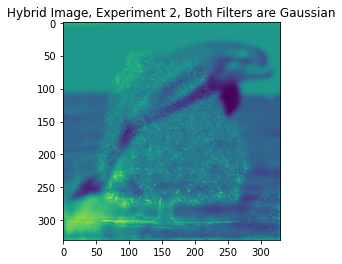

In [173]:
hybrid_img_2 = low_pass_image_TD_21 + high_pass_image_TD_22
plt.imshow(np.abs(hybrid_img_2),), plt.title("Hybrid Image, Experiment 2, Both Filters are Gaussian")

## **Hybrid Images is Generated using Gaussian Low-pass and Laplacian Filtering**

(<matplotlib.axes._subplots.AxesSubplot at 0x7f45552ce588>,
 Text(0.5, 1.0, 'High Frequecy Content Using Laplacian Filtering'))

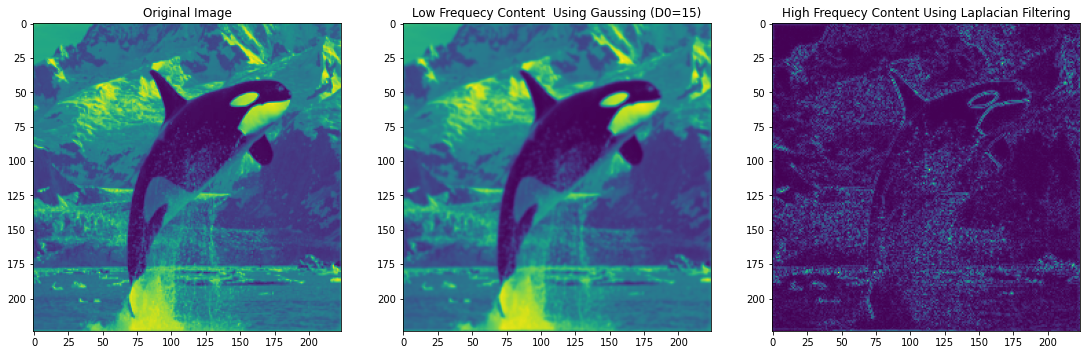

In [174]:
img_11, img_11_FD = helper.get_image_frequency_domain("img_11.jpg",224,224)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151), plt.imshow(img_11), plt.title("Original Image")

low_pass_image_11 = img_11_FD * filter.GLP(50,img_11.shape)
low_pass_image_TD_11 = helper.get_image_time_domain(low_pass_image_11)
low_pass_image_TD_11 = np.abs(low_pass_image_TD_11)
plt.subplot(152), plt.imshow(low_pass_image_TD_11), plt.title("Low Frequecy Content  Using Gaussing (D0=15)")

high_pass_image_11 = img_11_FD * filter.Laplacian(img_11.shape)
high_pass_image_TD_11 = helper.get_image_time_domain(high_pass_image_11)
high_pass_image_TD_11 = np.abs(high_pass_image_TD_11)
plt.subplot(153), plt.imshow(high_pass_image_TD_11), plt.title("High Frequecy Content Using Laplacian Filtering")

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4555189b38>,
 Text(0.5, 1.0, 'High Frequecy Content Using Laplacian Filtering'))

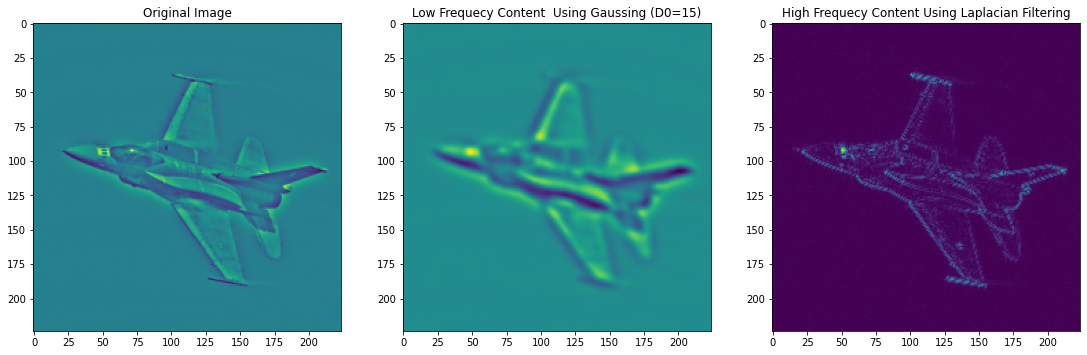

In [175]:
img_12, img_12_FD = helper.get_image_frequency_domain("img_12.jpg",224,224)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151), plt.imshow(img_12), plt.title("Original Image")

low_pass_image_12 = img_12_FD * filter.GLP(15,img_12.shape)
low_pass_image_TD_12 = helper.get_image_time_domain(low_pass_image_12)
low_pass_image_TD_12 = np.abs(low_pass_image_TD_12)
plt.subplot(152), plt.imshow(low_pass_image_TD_12), plt.title("Low Frequecy Content  Using Gaussing (D0=15)")

high_pass_image_12 = img_12_FD * filter.Laplacian(img_12.shape)
high_pass_image_TD_12 = helper.get_image_time_domain(high_pass_image_12)
high_pass_image_TD_12 = np.abs(high_pass_image_TD_12)

plt.subplot(153), plt.imshow(high_pass_image_TD_12), plt.title("High Frequecy Content Using Laplacian Filtering")

(<matplotlib.image.AxesImage at 0x7f4556971e48>,
 Text(0.5, 1.0, 'Hybrid Image, Experiment 3, One Filter is Gaussian, other Laplacian'))

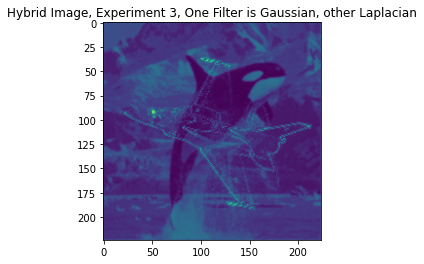

In [176]:
hybrid_img_3 = low_pass_image_TD_11 + 1*high_pass_image_TD_12
plt.imshow(np.abs(hybrid_img_3),), plt.title("Hybrid Image, Experiment 3, One Filter is Gaussian, other Laplacian")

(<matplotlib.axes._subplots.AxesSubplot at 0x7f455648d908>,
 Text(0.5, 1.0, 'High Frequecy Content Using Laplacian Filtering'))

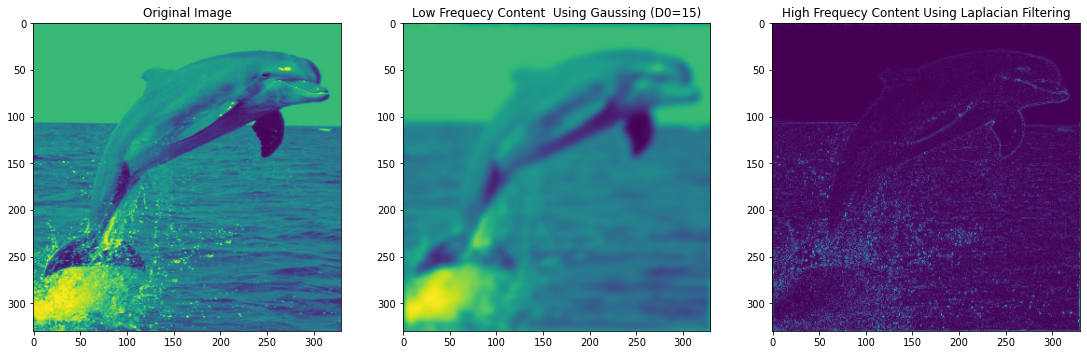

In [177]:
img_21, img_21_FD = helper.get_image_frequency_domain("img_21.jpg",330,330)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151), plt.imshow(img_21), plt.title("Original Image")

low_pass_image_21 = img_21_FD * filter.GLP(15,img_21.shape)
low_pass_image_TD_21 = helper.get_image_time_domain(low_pass_image_21)
low_pass_image_TD_21 = np.abs(low_pass_image_TD_21)
plt.subplot(152), plt.imshow(low_pass_image_TD_21), plt.title("Low Frequecy Content  Using Gaussing (D0=15)")

high_pass_image_21 = img_21_FD * filter.Laplacian(img_21.shape)
high_pass_image_TD_21 = helper.get_image_time_domain(high_pass_image_21)
high_pass_image_TD_21 = np.abs(high_pass_image_TD_21)
plt.subplot(153), plt.imshow(high_pass_image_TD_21), plt.title("High Frequecy Content Using Laplacian Filtering")

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4554fc6780>,
 Text(0.5, 1.0, 'High Frequecy Content Using Laplacian Filtering'))

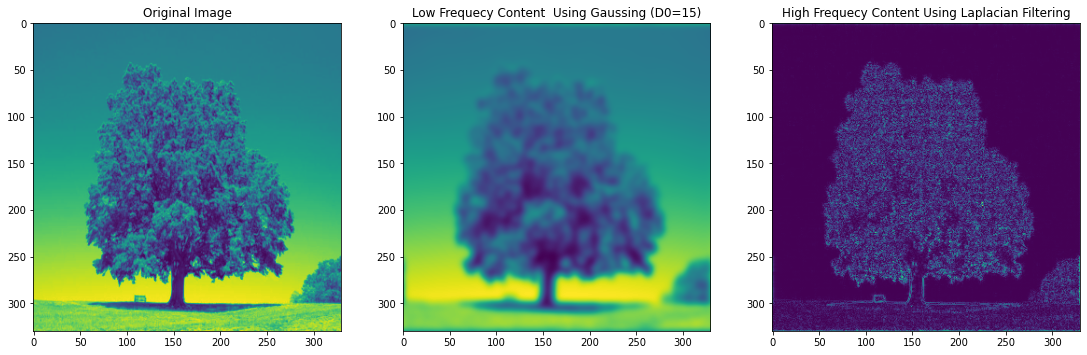

In [178]:
img_22, img_22_FD = helper.get_image_frequency_domain("img_22.jpg",330,330)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
plt.subplot(151), plt.imshow(img_22), plt.title("Original Image")

low_pass_image_22 = img_22_FD * filter.GLP(15,img_22.shape)
low_pass_image_TD_22 = helper.get_image_time_domain(low_pass_image_22)
low_pass_image_TD_22 = np.abs(low_pass_image_TD_22)
plt.subplot(152), plt.imshow(low_pass_image_TD_22), plt.title("Low Frequecy Content  Using Gaussing (D0=15)")

high_pass_image_22 = img_22_FD * filter.Laplacian(img_22.shape)
high_pass_image_TD_22 = helper.get_image_time_domain(high_pass_image_22)
high_pass_image_TD_22 = np.abs(high_pass_image_TD_22)
plt.subplot(153), plt.imshow(high_pass_image_TD_22), plt.title("High Frequecy Content Using Laplacian Filtering")

(<matplotlib.image.AxesImage at 0x7f4554ecc3c8>,
 Text(0.5, 1.0, 'Hybrid Image, Experiment 4, One Filter is Gaussian, other Laplacian'))

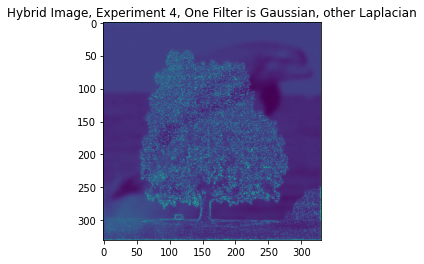

In [179]:
hybrid_img_4 = low_pass_image_TD_21 + high_pass_image_TD_22
plt.imshow(np.abs(hybrid_img_4),), plt.title("Hybrid Image, Experiment 4, One Filter is Gaussian, other Laplacian")